# Business understanding 
## Real world problem: How to increase property value for homeowners? 
### Who are the stakeholders? Homeowners 

#### This notebook should show how to increase proeprty value, by adding bathrooms and increasing the square foot living space.

In [1]:
# import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "housepj", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>King County Housing Data Description</title>
</head>
<body>

<h1>Data Description for King County Housing Dataset</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Unique identifier for a house</td>
    </tr>
    <tr>
        <td>date</td>
        <td>Date the house was sold</td>
    </tr>
    <tr>
        <td>price</td>
        <td>Sale price (prediction target)</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>Number of bedrooms</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>sqft_living</td>
        <td>Square footage of living space in the home</td>
    </tr>
    <tr>
        <td>sqft_lot</td>
        <td>Square footage of the lot</td>
    </tr>
    <tr>
        <td>floors</td>
        <td>Number of floors (levels) in the house</td>
    </tr>
    <tr>
        <td>waterfront</td>
        <td>Whether the house is on a waterfront</td>
    </tr>
    <tr>
        <td>greenbelt</td>
        <td>Whether the house is adjacent to a green belt</td>
    </tr>
    <tr>
        <td>nuisance</td>
        <td>Whether the house has traffic noise or other recorded nuisances</td>
    </tr>
    <tr>
        <td>view</td>
        <td>Quality of view from the house</td>
    </tr>
    <tr>
        <td>condition</td>
        <td>Overall condition of the house (related to maintenance)</td>
    </tr>
    <tr>
        <td>grade</td>
        <td>Overall grade of the house (related to construction and design)</td>
    </tr>
    <tr>
        <td>heat_source</td>
        <td>Heat source for the house</td>
    </tr>
    <tr>
        <td>sewer_system</td>
        <td>Sewer system for the house</td>
    </tr>
    <tr>
        <td>sqft_above</td>
        <td>Square footage of the house apart from the basement</td>
    </tr>
    <tr>
        <td>sqft_basement</td>
        <td>Square footage of the basement</td>
    </tr>
    <tr>
        <td>sqft_garage</td>
        <td>Square footage of garage space</td>
    </tr>
    <tr>
        <td>sqft_patio</td>
        <td>Square footage of outdoor porch or deck space</td>
    </tr>
    <tr>
        <td>yr_built</td>
        <td>Year when the house was built</td>
    </tr>
    <tr>
        <td>yr_renovated</td>
        <td>Year when the house was renovated</td>
    </tr>
    <tr>
        <td>address</td>
        <td>Street address</td>
    </tr>
</table>

</body>
</html>




In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [5]:
### Pre cleaned data set has 30,155 houses

In [6]:
# Create a new column 'renovation_status' based on 'yr_renovated'
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'No Renovation' if x == 0 else 'Renovation')

# Display unique values to verify the changes
print(df['renovation_status'].unique())

# Display unique values of 'renovation_status'
print(df['renovation_status'].unique())

# Display value counts of 'renovation_status'
print(df['renovation_status'].value_counts())

import pandas as pd

# Assuming your DataFrame is named 'df'
renovation_stats = df.groupby('renovation_status')['price'].describe()

# Display the results
print(renovation_stats)

['No Renovation' 'Renovation']
['No Renovation' 'Renovation']
No Renovation    28783
Renovation        1372
Name: renovation_status, dtype: int64
                     count          mean           std      min       25%  \
renovation_status                                                           
No Renovation      28783.0  1.091996e+06  8.619636e+05  27360.0  643957.5   
Renovation          1372.0  1.455523e+06  1.395891e+06  30108.0  740375.0   

                         50%        75%         max  
renovation_status                                    
No Renovation       851450.0  1290000.0  30750000.0  
Renovation         1100000.0  1710875.0  23500000.0  


In [7]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [8]:
# Display the bottom 10 values for sqft_lot
bottom_10_sqft_lot = df['sqft_lot'].value_counts().tail(10)
print(bottom_10_sqft_lot)


8861      1
340639    1
51872     1
17057     1
15022     1
12975     1
10940     1
33855     1
49857     1
4098      1
Name: sqft_lot, dtype: int64


In [9]:
# Display the bottom 10 values for sqft_lot
bottom_10_sqft_lot = df['sqft_lot'].value_counts().sort_index().head(10)
print(bottom_10_sqft_lot)


402    1
412    1
420    1
435    1
468    1
474    3
475    2
478    3
479    1
480    1
Name: sqft_lot, dtype: int64


In [10]:
top_10_sqft_lot = df['sqft_lot'].value_counts().sort_index().tail(10)
print(top_10_sqft_lot)


1277541    1
1354280    1
1400855    1
1480604    1
1576001    1
1722798    1
1951712    1
2657160    1
3067495    1
3253932    1
Name: sqft_lot, dtype: int64


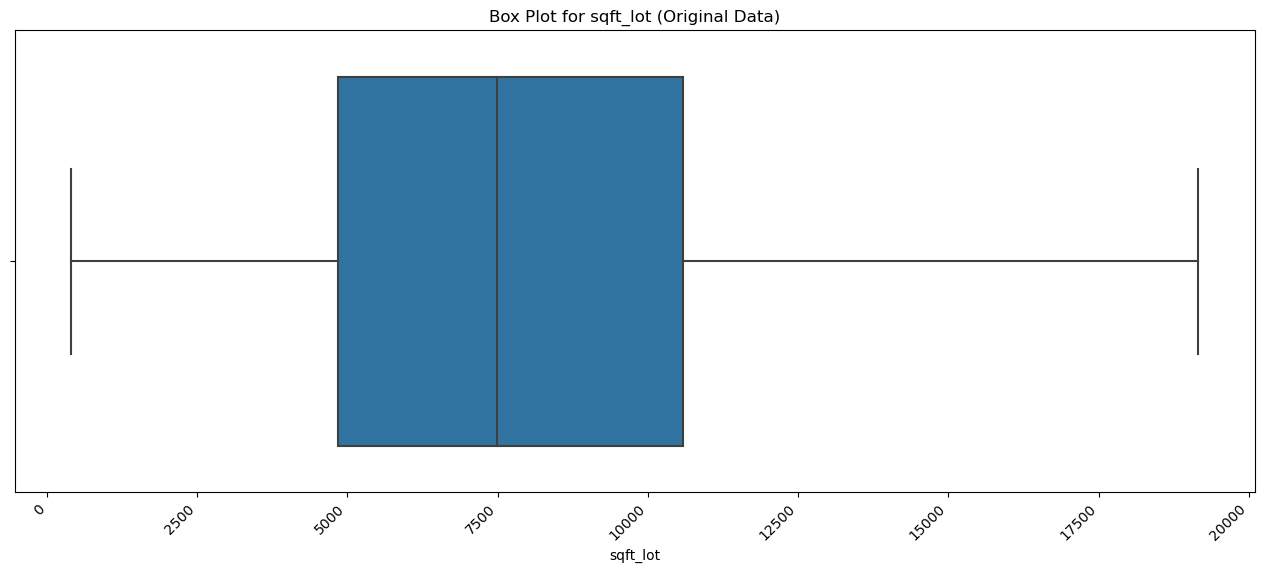

In [11]:
# Create a box plot for sqft_lot with actual values on the x-axis using the original DataFrame (df)
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_lot', data=df, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_lot (Original Data)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [12]:
import pandas as pd

# Assuming df is your DataFrame and 'sqft_lot' is the column containing the data
# You can calculate the IQR
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude rows with outliers
df_cleaned = df[(df['sqft_lot'] >= lower_bound) & (df['sqft_lot'] <= upper_bound)]



In [13]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_lot'].describe())

# Print summary statistics of the cleaned DataFrame
print("\nCleaned DataFrame Summary:")
print(df_cleaned['sqft_lot'].describe())


Original DataFrame Summary:
count    3.015500e+04
mean     1.672360e+04
std      6.038260e+04
min      4.020000e+02
25%      4.850000e+03
50%      7.480000e+03
75%      1.057900e+04
max      3.253932e+06
Name: sqft_lot, dtype: float64

Cleaned DataFrame Summary:
count    26595.000000
mean      7053.128483
std       3769.417459
min        402.000000
25%       4500.000000
50%       7012.000000
75%       9170.500000
max      19163.000000
Name: sqft_lot, dtype: float64


In [14]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_above'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_above = df['sqft_above'].value_counts().sort_index().head(10)
print(bottom_10_sqft_above)

top_10_sqft_above = df['sqft_above'].value_counts().sort_index().tail(10)
print(top_10_sqft_above)


Original DataFrame Summary:
count    30155.000000
mean      1809.826098
std        878.306131
min          2.000000
25%       1180.000000
50%       1560.000000
75%       2270.000000
max      12660.000000
Name: sqft_above, dtype: float64
2      1
100    1
170    1
210    1
260    1
290    4
300    1
310    1
320    3
340    1
Name: sqft_above, dtype: int64
7780     2
8070     1
8280     1
8500     1
8710     1
8882     1
9410     1
9440     1
12470    1
12660    1
Name: sqft_above, dtype: int64


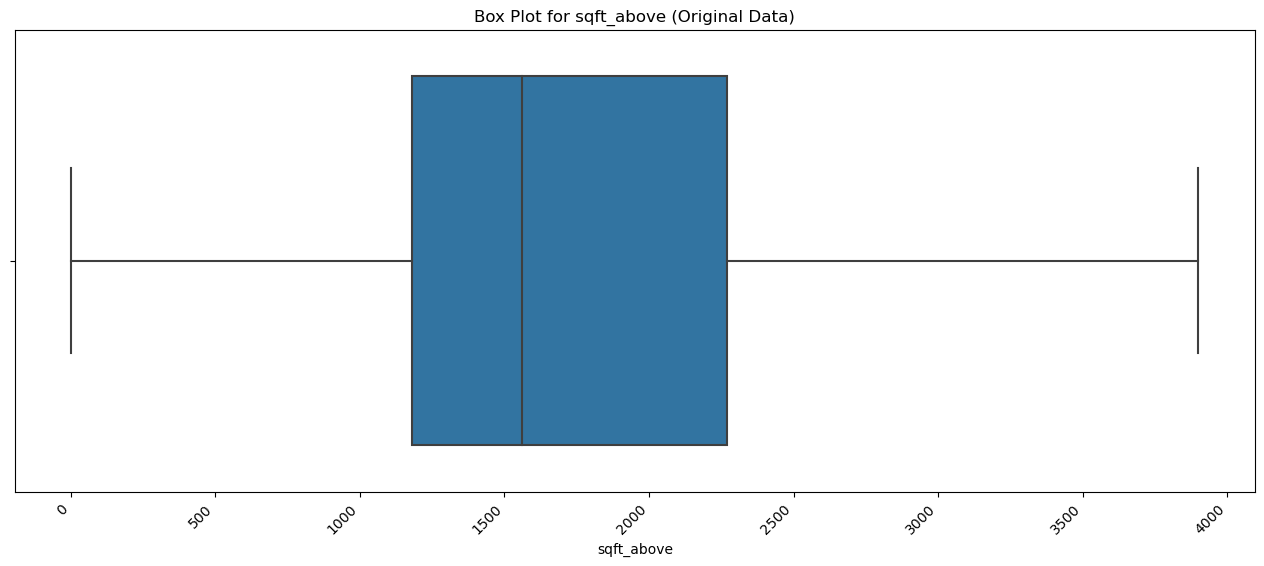

In [15]:
# Create a box plot for sqft_above with actual values on the x-axis using the original DataFrame (df)
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_above', data=df, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_above (Original Data)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [16]:
Q1 = df['sqft_above'].quantile(0.25)
Q3 = df['sqft_above'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude rows with outliers
df_cleaned = df[(df['sqft_above'] >= lower_bound) & (df['sqft_above'] <= upper_bound)]

# Print summary statistics of the original DataFrame
print("Cleaned DataFrame Summary:")
print(df_cleaned['sqft_above'].describe())


Cleaned DataFrame Summary:
count    29352.000000
mean      1732.110384
std        737.418960
min          2.000000
25%       1170.000000
50%       1540.000000
75%       2200.000000
max       3900.000000
Name: sqft_above, dtype: float64


In [17]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_basement'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_basement = df['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

top_10_sqft_basement = df['sqft_basement'].value_counts().sort_index().tail(10)
print(top_10_sqft_basement)


Original DataFrame Summary:
count    30155.000000
mean       476.039396
std        579.631302
min          0.000000
25%          0.000000
50%          0.000000
75%        940.000000
max       8020.000000
Name: sqft_basement, dtype: float64
0      15471
1          1
60         1
70         3
80         9
90         2
100       10
110        7
120       10
130        6
Name: sqft_basement, dtype: int64
3810    1
3910    1
3960    1
4000    1
4130    1
4420    1
4520    1
5350    1
6970    1
8020    1
Name: sqft_basement, dtype: int64


In [18]:
# Create a DataFrame without 0 values in 'sqft_basement' for summary statistics
df_no_zeros = df_cleaned.query('sqft_basement > 0')

# Display summary statistics for 'sqft_basement' without 0 values
summary_no_zeros = df_no_zeros['sqft_basement'].describe()

# Print the summary statistics
print(summary_no_zeros)


count    14462.000000
mean       964.990112
std        419.234820
min          1.000000
25%        660.000000
50%        950.000000
75%       1210.000000
max       4000.000000
Name: sqft_basement, dtype: float64


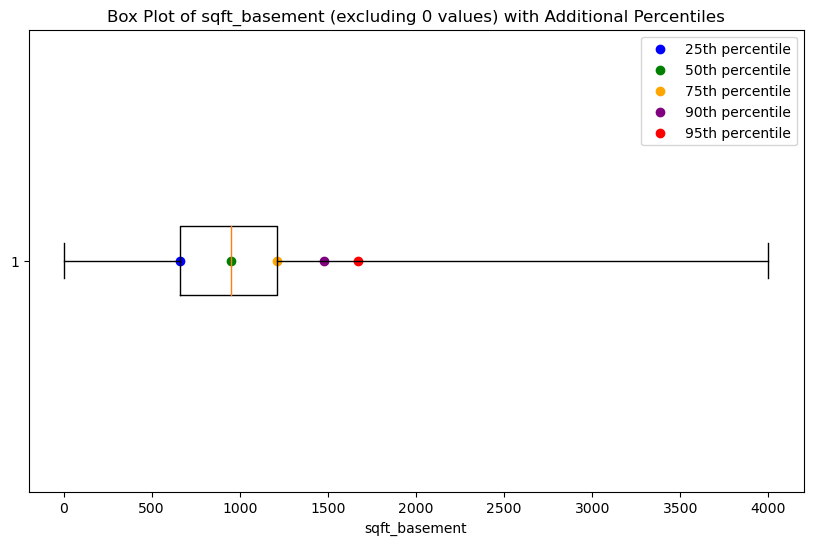

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_basement' without 0 values with additional percentiles
percentiles = [25, 50, 75, 90, 95]

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df_no_zeros['sqft_basement'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zeros['sqft_basement'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

plt.title('Box Plot of sqft_basement (excluding 0 values) with Additional Percentiles')
plt.xlabel('sqft_basement')
plt.legend()
plt.show()



In [20]:
# Count the number of points in 'sqft_basement' greater than 1500
count_greater_than_1210 = (df_cleaned['sqft_basement'] > 1550).sum()

# Print the result
print(f"Number of sqft_basement points greater than 1500: {count_greater_than_1210}")


Number of sqft_basement points greater than 1500: 1122


In [21]:
# Define the cutoff values for outliers
lower_cutoff = 660
upper_cutoff = 1500

# Create a new DataFrame without outliers, but keep houses with 0 sqft_basement
df_cleaned = df_cleaned[((df_cleaned['sqft_basement'] > 0) & (df_cleaned['sqft_basement'] >= lower_cutoff) & (df_cleaned['sqft_basement'] <= upper_cutoff)) | (df_cleaned['sqft_basement'] == 0)]

# Print the summary statistics for 'sqft_basement' in the new DataFrame
print(df_cleaned['sqft_basement'].describe())


count    24481.000000
mean       405.972019
std        524.093210
min          0.000000
25%          0.000000
50%          0.000000
75%        940.000000
max       1500.000000
Name: sqft_basement, dtype: float64


In [22]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_garage'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_garage = df['sqft_garage'].value_counts().sort_index().head(10)
print(bottom_10_sqft_garage)

top_10_sqft_garage = df['sqft_garage'].value_counts().sort_index().tail(10)
print(top_10_sqft_garage)

Original DataFrame Summary:
count    30155.000000
mean       330.211142
std        285.770536
min          0.000000
25%          0.000000
50%        400.000000
75%        510.000000
max       3580.000000
Name: sqft_garage, dtype: float64
0      10009
1          1
40         1
70         2
80         5
90         2
100        3
110        5
120        4
130       12
Name: sqft_garage, dtype: int64
2190    1
2210    1
2240    1
2400    1
2530    1
2570    1
2840    1
3050    1
3390    1
3580    1
Name: sqft_garage, dtype: int64


In [23]:
# Create a DataFrame without 0 values in 'sqft_garage' for summary statistics
df_no_zerosg = df_cleaned.query('sqft_garage > 0')

# Display summary statistics for 'sqft_garage' without 0 values
summary_no_zerosg = df_no_zerosg['sqft_garage'].describe()

# Print the summary statistics
print(summary_no_zerosg)


count    16519.000000
mean       486.711423
std        174.324622
min         40.000000
25%        400.000000
50%        470.000000
75%        570.000000
max       2530.000000
Name: sqft_garage, dtype: float64


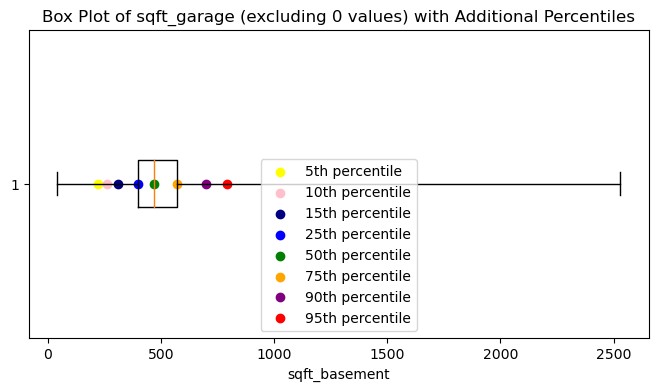

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_garage' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(8, 4))
boxplot = plt.boxplot(df_no_zerosg['sqft_garage'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosg['sqft_garage'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

plt.title('Box Plot of sqft_garage (excluding 0 values) with Additional Percentiles')
plt.xlabel('sqft_basement')
plt.legend()
plt.show()


In [25]:
df_no_zerosg
# Count the number of points in 'sqft_garage' less than 400
count_less_than_400 = (df_no_zerosg['sqft_garage'] < 400).sum()

# Print the result
print(f"Number of sqft_garage points less than 400: {count_less_than_400}")


Number of sqft_garage points less than 400: 3736


In [26]:
# Define the cutoff values for outliers
lower_cutoff = 400
upper_cutoff = 600

# Create a new DataFrame without outliers, but keep houses with 0 sqft_garage
df_cleaned = df_cleaned[((df_cleaned['sqft_garage'] > 0) & (df_cleaned['sqft_garage'] >= lower_cutoff) & (df_cleaned['sqft_garage'] <= upper_cutoff)) | (df_cleaned['sqft_garage'] == 0)]

# Print the summary statistics for 'sqft_basement' in the new DataFrame
print(df_cleaned['sqft_garage'].describe())

count    17518.000000
mean       261.062507
std        241.712840
min          0.000000
25%          0.000000
50%        400.000000
75%        480.000000
max        600.000000
Name: sqft_garage, dtype: float64


In [27]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_patio'].describe())

# Display the bottom 10 values for sqft_patio
bottom_10_sqft_patio = df['sqft_patio'].value_counts().sort_index().head(10)
print(bottom_10_sqft_patio)

top_10_sqft_patio = df['sqft_patio'].value_counts().sort_index().tail(10)
print(top_10_sqft_patio)

Original DataFrame Summary:
count    30155.000000
mean       217.412038
std        245.302792
min          0.000000
25%         40.000000
50%        150.000000
75%        320.000000
max       4370.000000
Name: sqft_patio, dtype: float64
0     6760
8        1
10      20
12       1
14       1
15       5
18       1
20     124
22       1
24       3
Name: sqft_patio, dtype: int64
2210    1
2280    1
2350    2
2360    1
2500    1
2590    1
2880    1
2940    1
3550    1
4370    1
Name: sqft_patio, dtype: int64


In [28]:
# Create a DataFrame without 0 values in 'sqft_patio' for summary statistics
df_no_zerosp = df_cleaned.query('sqft_patio > 0')

# Display summary statistics for 'sqft_patio' without 0 values
summary_no_zerosp = df_no_zerosp['sqft_patio'].describe()

# Print the summary statistics
print(summary_no_zerosp)


count    13362.000000
mean       256.090031
std        214.531693
min         10.000000
25%        100.000000
50%        200.000000
75%        340.000000
max       2360.000000
Name: sqft_patio, dtype: float64


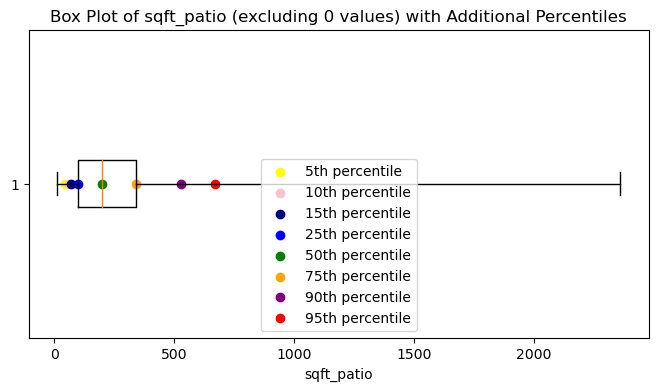

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(8, 4))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()

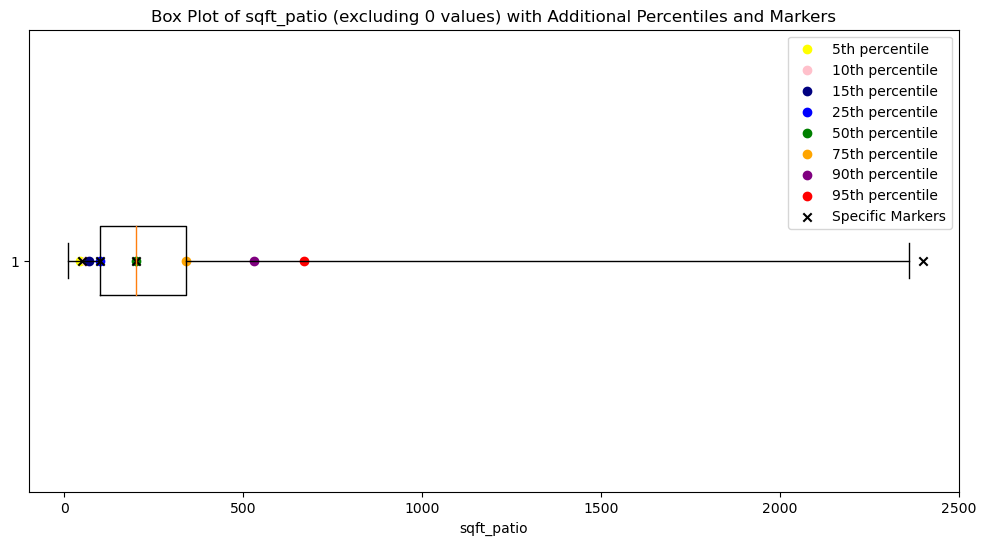

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

# Set x-axis limits
plt.xlim(-100, 2500)

# Add specific markers for 50, 100, 200-2400
plt.scatter([50, 100, 200, 2400], [1, 1, 1, 1], marker='x', color='black', label='Specific Markers')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles and Markers')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()


In [31]:
# Define the cutoff values for outliers
lower_cutoff = 50
upper_cutoff = 500

# Create a new DataFrame without outliers, but keep houses with 0 sqft_patio
df_cleaned = df_cleaned[((df_cleaned['sqft_patio'] > 0) & (df_cleaned['sqft_patio'] >= lower_cutoff) & (df_cleaned['sqft_patio'] <= upper_cutoff)) | (df_cleaned['sqft_patio'] == 0)]

# Print the summary statistics for 'sqft_patio' in the new DataFrame
print(df_cleaned['sqft_patio'].describe())

count    15357.000000
mean       151.806212
std        137.532859
min          0.000000
25%          0.000000
50%        130.000000
75%        240.000000
max        500.000000
Name: sqft_patio, dtype: float64



# Cleaning the data

## In order to properly interpert the data, removal of missing data and duplicates is needed.


In [32]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [33]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Removal of uncessary columns 
## In this situation it was important to remove certain variables to better interpret the data. Some reasons for removing these columns included the lack of control the homewoner has on the variable. For instance the homeowner cannot change the address, latitude, logntude, or the year built, ect.

# Search for outliers 

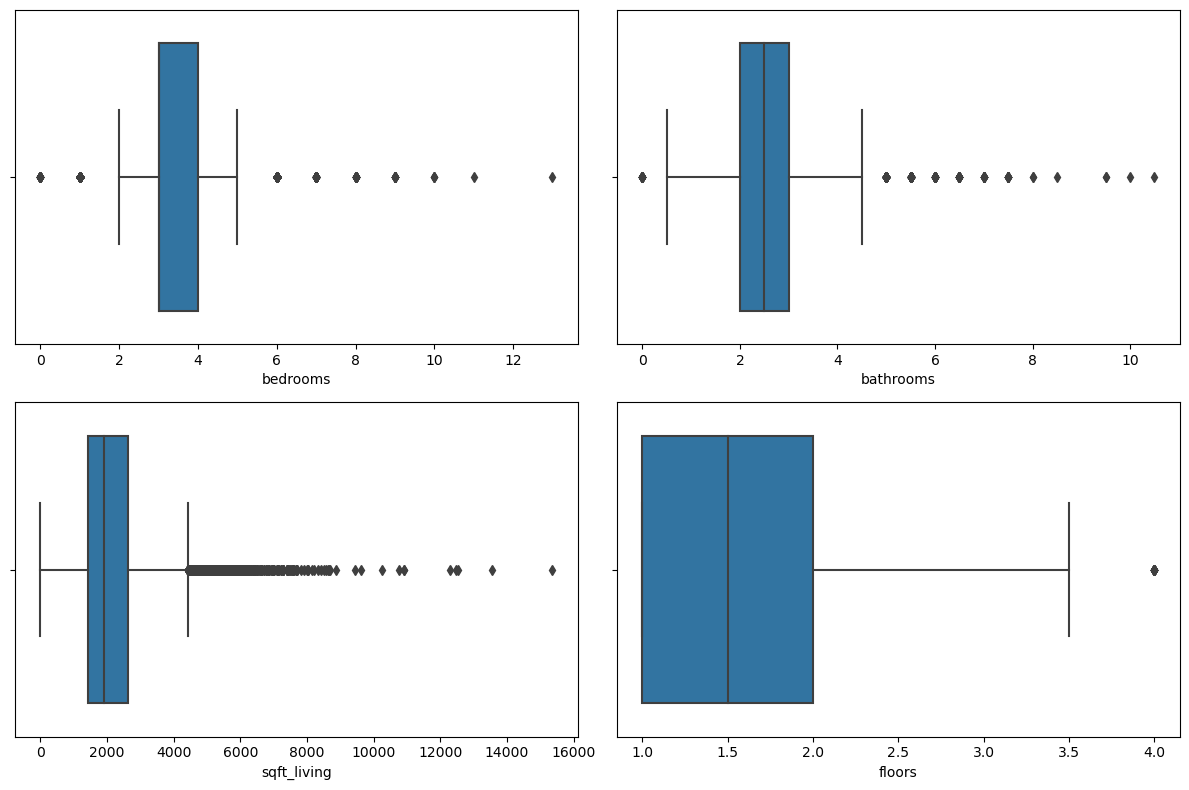

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your cleaned DataFrame
variables_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create individual box plots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=variable, data=df_cleaned)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [35]:

# Display the bottom 10 values for sqft_living
bottom_10_sqft_living = df_cleaned.sort_values(by='sqft_living').head(10)
print(bottom_10_sqft_living[['sqft_living']])


       sqft_living
14977            3
8694           260
8391           290
23622          290
5811           290
11989          310
476            320
13015          320
11420          320
29356          340


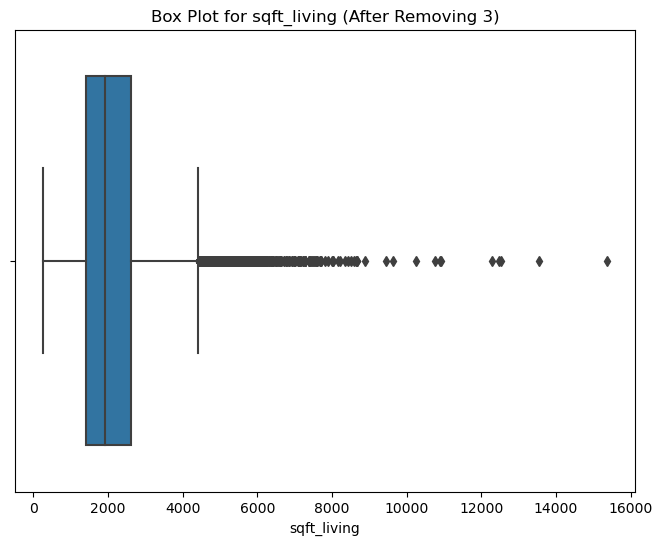

In [36]:

# Remove the specified value (3) for sqft_living
df_cleaned_filtered_sqft = df_cleaned[df_cleaned['sqft_living'] != 3]

# Create a new box plot for sqft_living after removal
plt.figure(figsize=(8, 6))
sns.boxplot(x='sqft_living', data=df_cleaned_filtered_sqft)
plt.title('Box Plot for sqft_living (After Removing 3)')
plt.show()


In [37]:
# Removal of extreme outliers

# Filter out houses with less than 1 bedroom and more than 5 bedrooms
df_cleaned = df_cleaned[(df_cleaned['bedrooms'] >= 1) & (df_cleaned['bedrooms'] <= 5)]

# Filter out houses with less than 1 bathroom and more than 5 bathrooms
df_cleaned = df_cleaned[(df_cleaned['bathrooms'] >= 1) & (df_cleaned['bathrooms'] <= 5)]

# Filter out houses with sqft_living outside the specified range (200 to 4200)
df_cleaned = df_cleaned[(df_cleaned['sqft_living'] >= 500) & (df_cleaned['sqft_living'] <= 4200)]

# Filter out houses with less than 1 floor and more than 3.5 floors
df_cleaned = df_cleaned[(df_cleaned['floors'] >= 1) & (df_cleaned['floors'] <= 3.5)]




In [38]:
#descriptive statistics
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.848500e+04,2.848500e+04,28485.000000,28485.000000,28485.000000,2.848500e+04,28485.000000,28485.000000,28485.000000,28485.000000,28485.000000,28485.000000,28485.000000,28485.000000,28485.000000
mean,4.565490e+09,1.025960e+06,3.329542,2.250641,1997.394523,1.549136e+04,1.526119,1721.308899,449.135124,318.587713,205.267685,1974.619273,87.689064,47.318378,-121.288737
std,2.883869e+09,6.734916e+05,0.855268,0.770265,775.802908,5.698722e+04,0.561658,737.491126,537.835610,271.516464,227.339145,31.904157,409.336491,1.459635,5.828568
min,1.000055e+06,2.736000e+04,1.000000,1.000000,500.000000,4.020000e+02,1.000000,390.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.113701e+09,6.375000e+05,3.000000,2.000000,1400.000000,4.791000e+03,1.000000,1160.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.398380,-122.327320
50%,3.885804e+09,8.464000e+05,3.000000,2.500000,1870.000000,7.350000e+03,1.500000,1520.000000,0.000000,380.000000,140.000000,1977.000000,0.000000,47.547680,-122.228185
75%,7.299800e+09,1.250000e+06,4.000000,2.500000,2500.000000,1.024000e+04,2.000000,2160.000000,910.000000,500.000000,300.000000,2003.000000,0.000000,47.670670,-122.117070
max,9.904000e+09,3.075000e+07,5.000000,5.000000,4200.000000,3.253932e+06,3.500000,5500.000000,4000.000000,2840.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [39]:
# List of columns to remove
columns_to_remove = ['address','lat', 'long','date','yr_built', 'yr_renovated']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
4  8562780790  592500.0         2        2.0         1120       758     2.0   
5  2807100156  625000.0         2        1.0         1190      5688     1.0   

  waterfront greenbelt nuisance     view condition      grade  heat_source  \
0         NO        NO       NO     NONE      Good  7 Average          Gas   
1         NO        NO      YES  AVERAGE   Average  7 Average          Oil   
3         NO        NO       NO  AVERAGE   Average   9 Better          Gas   
4         NO        NO      YES     NONE   Average  7 Average  Electricity   
5         NO        NO      YES     NONE   Average  7 Average  Electricity   

  sewer_system  sqft_above  sqft_basement  sqft_garage  

# Making Categorical Data Interpretable 
## It is necessary to create dumie variables inorder to interpreate the results of catagorical data and its impacts on price.

In [40]:
# Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system', 'greenbelt', 'waterfront', 'view'])


In [41]:
#checking to see if dummie variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

               id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7399300360   675000.0         4        1.0         1180      7140   
1      8910500230   920000.0         5        2.5         2770      6703   
3      1604601802   775000.0         3        3.0         2160      1400   
4      8562780790   592500.0         2        2.0         1120       758   
5      2807100156   625000.0         2        1.0         1190      5688   
...           ...        ...       ...        ...          ...       ...   
30150  7834800180  1555000.0         5        2.0         1910      4000   
30151   194000695  1313000.0         3        2.0         2020      5800   
30152  7960100080   800000.0         3        2.0         1620      3600   
30153  2781280080   775000.0         3        2.5         2570      2889   
30154  9557800100   500000.0         3        1.5         1200     11058   

       floors  sqft_above  sqft_basement  sqft_garage  sqft_patio  \
0         1.0     

In [42]:
# Display the column names in your DataFrame
print(df_cleaned.columns)


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'heat_source_Electricity',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'renovation_status_No Renovation',
       'renovation_status_Renovation', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'nuisance_NO',
       'nuisance_YES', 'sewer_system_PRIVATE',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'greenbelt_NO', 'greenbelt_YES',
       'waterfront_NO', 'waterfront_YES', 

# Using StatsModels for Multiple Linear Regression

In [43]:
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     467.3
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:13:45   Log-Likelihood:            -4.1536e+05
No. Observations:               28485   AIC:                         8.308e+05
Df Residuals:                   28443   BIC:                         8.311e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [44]:
# view model coefficients
model.params


const                              3.653258e+05
id                                -4.815910e-06
bedrooms                          -3.293283e+04
bathrooms                          3.745005e+04
sqft_living                        5.695522e+01
sqft_lot                           5.086862e-01
floors                            -7.736735e+04
sqft_above                         2.222038e+02
sqft_basement                      1.568406e+02
sqft_garage                       -2.495048e+02
sqft_patio                         7.493094e+01
condition_Average                  4.677080e+04
condition_Fair                     1.602889e+04
condition_Good                     1.301714e+05
condition_Poor                    -2.913647e+04
condition_Very Good                2.014912e+05
heat_source_Electricity            1.228957e+04
heat_source_Electricity/Solar     -1.535909e+04
heat_source_Gas                    4.318047e+04
heat_source_Gas/Solar              2.077403e+05
heat_source_Oil                    5.802

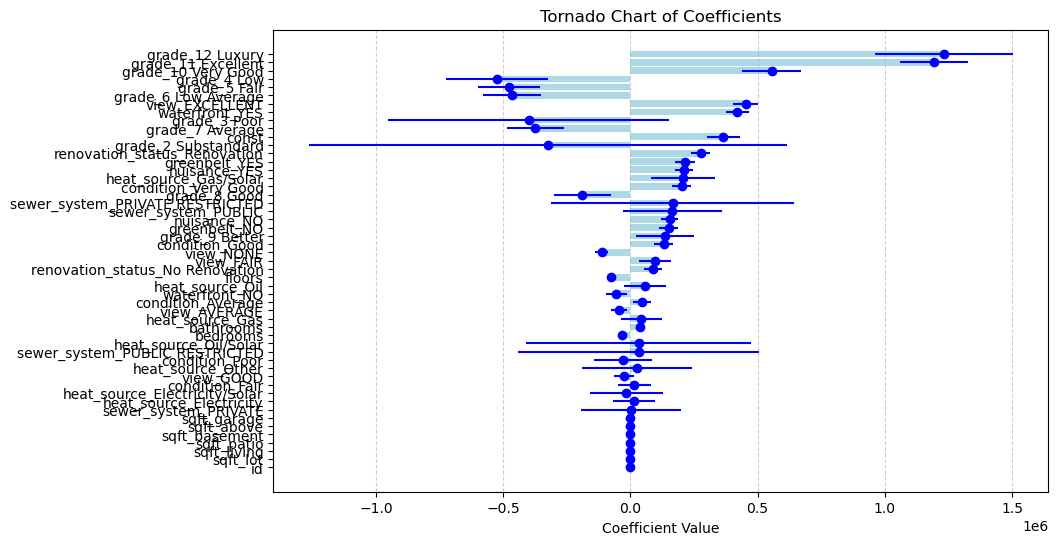

In [45]:

# Extract the coefficients and their standard errors from the regression summary
coefficients = model.params
standard_errors = model.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Working with only statistically significant data
## Data with p values <.05

In [46]:
# Filter coefficients based on p-values
significant_vars = model.params[model.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars)


const                              3.653258e+05
id                                -4.815910e-06
bedrooms                          -3.293283e+04
bathrooms                          3.745005e+04
sqft_living                        5.695522e+01
sqft_lot                           5.086862e-01
floors                            -7.736735e+04
sqft_above                         2.222038e+02
sqft_basement                      1.568406e+02
sqft_garage                       -2.495048e+02
sqft_patio                         7.493094e+01
condition_Average                  4.677080e+04
condition_Good                     1.301714e+05
condition_Very Good                2.014912e+05
heat_source_Gas/Solar              2.077403e+05
renovation_status_No Renovation    8.962742e+04
renovation_status_Renovation       2.756984e+05
grade_10 Very Good                 5.550931e+05
grade_11 Excellent                 1.193182e+06
grade_12 Luxury                    1.231991e+06
grade_4 Low                       -5.235

In [49]:


# Your target variable
target_variable = 'price'

# List of significant variable names (including 'const')
significant_vars_names = [
    'const', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
    'sqft_basement', 'sqft_garage', 'sqft_patio', 'condition_Average', 'condition_Good',
    'condition_Very Good', 'heat_source_Gas/Solar', 'renovation_status_No Renovation',
    'renovation_status_Renovation', 'grade_10 Very Good', 'grade_11 Excellent',
    'grade_12 Luxury', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
    'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'nuisance_NO', 'nuisance_YES',
    'greenbelt_NO', 'greenbelt_YES', 'waterfront_NO', 'waterfront_YES',
    'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_NONE'
]

# Check if 'const' is in the DataFrame columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model_significant = sm.OLS(df_cleaned[target_variable], significant_vars).fit()

# Print model summary
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     601.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:16:47   Log-Likelihood:            -4.1551e+05
No. Observations:               28485   AIC:                         8.311e+05
Df Residuals:                   28453   BIC:                         8.314e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

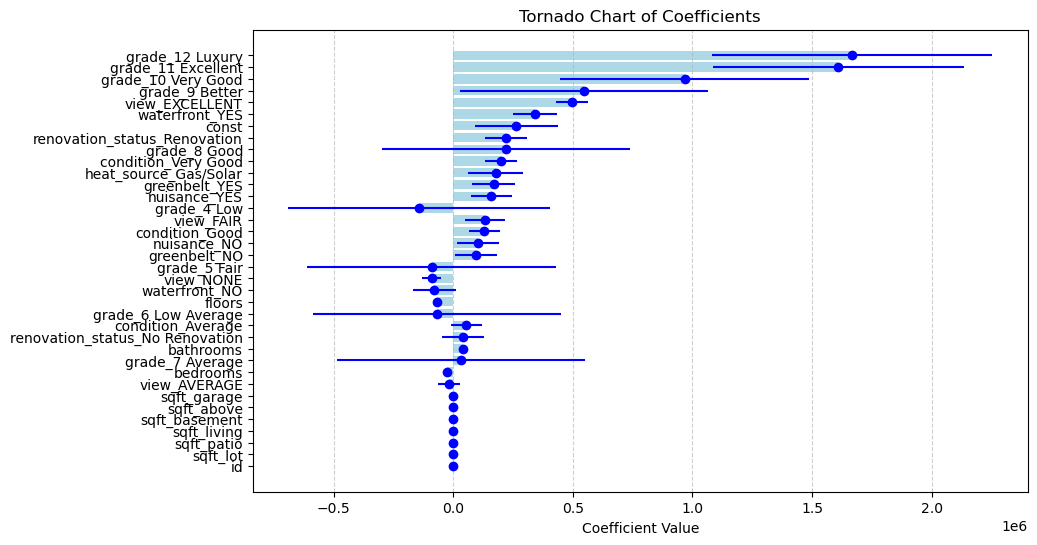

In [52]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = model_significant.params
standard_errors = model_significant.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

plt.show()
